# Human Pose Estimation

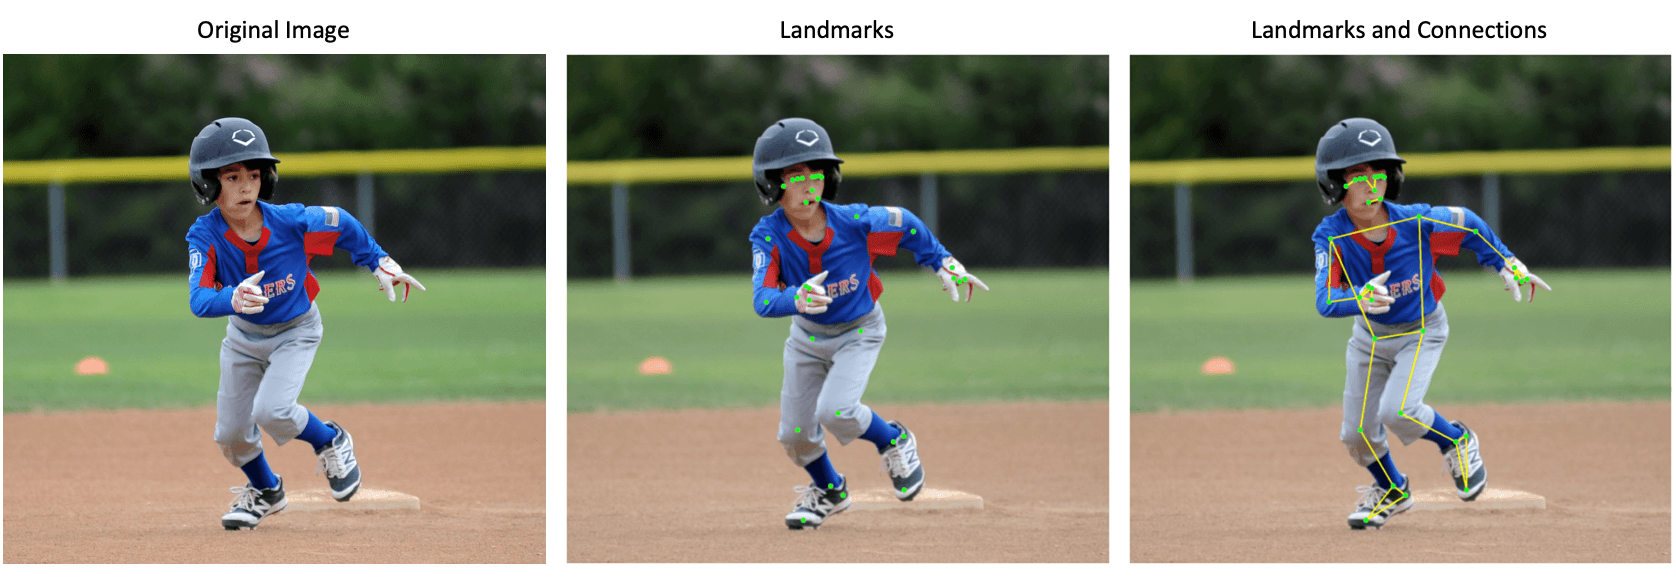

We will use google's media pipe framework to introduce the topic, we will cover:

1. Detect and draw pose landmarks
2. Draw landmarks connections
3. Acquire the pixel coordinates of landmarks

The figure below that show the landmark model in media pipe pose which consists of 33 unique landmarks as identified in the figure, so when we process an image that contains a human figure, these landmarks will be detecte by the model and then we'll have access to various methods that will allow us to annotate the image with the landmarks and connections and also provide us access to the pixel coordinates for each of the landmarks. 

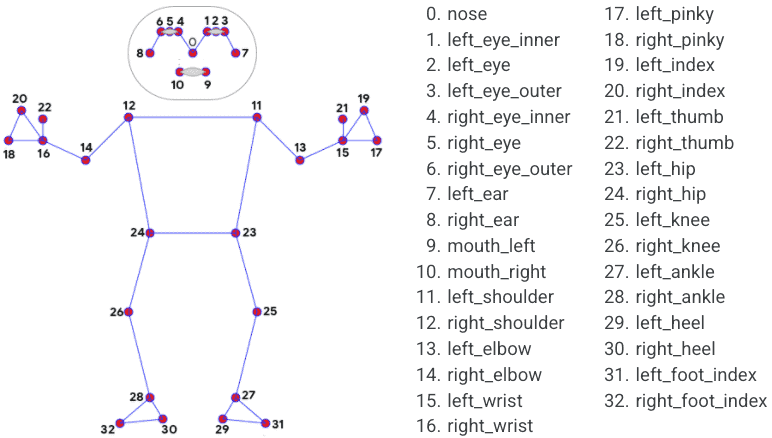

---

## 1. Pose Estimation in Images

Before we apply this model to videos, let's see how it is implemented on individual images. Note that tha images must contain a person to detect the pose.

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

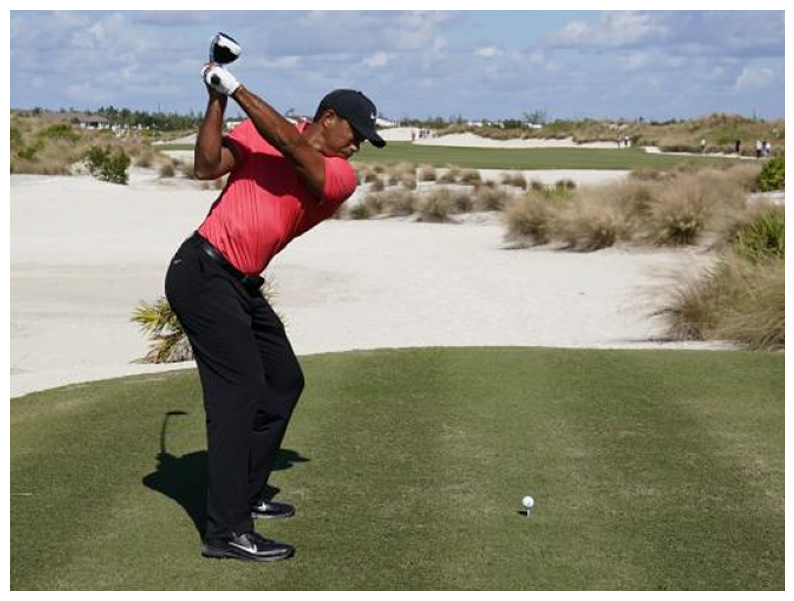

In [2]:
img = cv2.imread("./images/Tiger_Woods.png")

img_width = img.shape[1]
img_height = img.shape[0]

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(img[:, :, ::-1])

## 2. Initialize Mediapipe

Before we can use MediaPipe to process an image and draw landmarks and connections we must create the following MediaPipe objects from `mp.solutions`, as shown below.

In [3]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

## 3. Process Image and Draw Landmarks

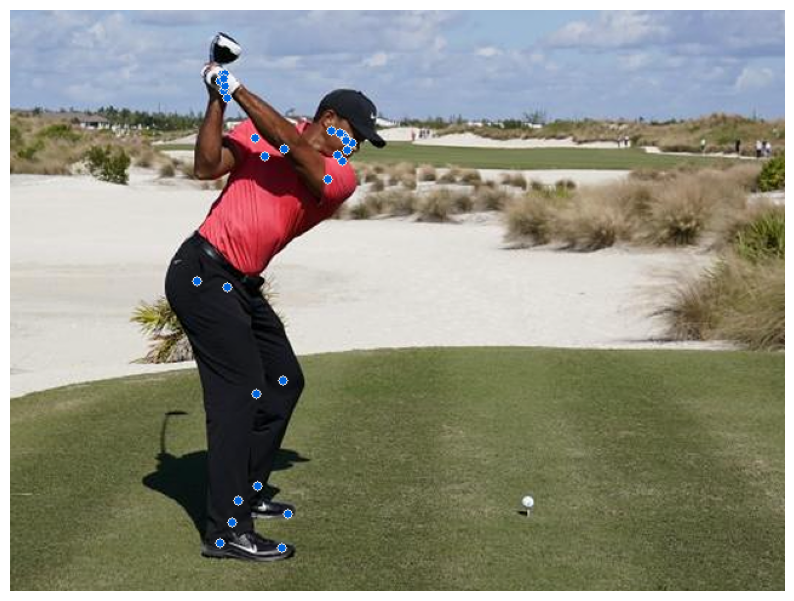

In [5]:
with mp_pose.Pose(static_image_mode = True) as pose:
        
    # Make a copy of the original image.
    annotated_img = img.copy()
    
    # Process image.
    results = pose.process(img)
    
    # Draw landmarks.
    circle_radius = int(.007*img_height) # Scale landmark circles as percentage of image height.
    
    # Specify landmark drawing style.
    point_spec = mp_drawing.DrawingSpec(color=(220, 100, 0), thickness=-1, circle_radius=circle_radius)
    
    # Draw landmark points.
    mp_drawing.draw_landmarks(annotated_img, 
                              landmark_list=results.pose_landmarks,   
                              landmark_drawing_spec=point_spec)
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(annotated_img[:,:,::-1]);

## 3. Draw Landmak Detections

In order to draw the connections between adjacent landmark points we need to pass `POSE_CONNECTIONS` to the `draw_landmarks()` method.

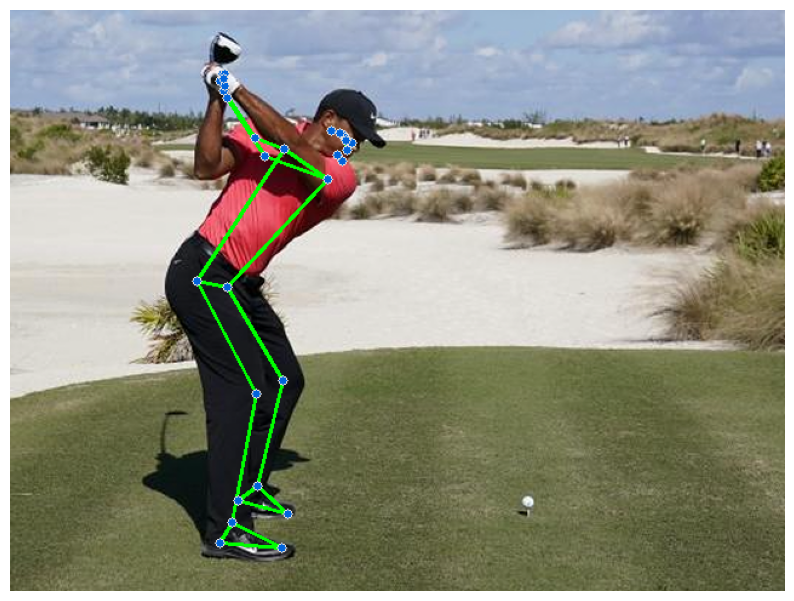

In [6]:
# Make acopy of the original image.
annotated_img = img.copy()

# Specify landmark connections drawing style.
line_spec = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)

# Draw both landmarks points and connections.
mp_drawing.draw_landmarks(
    annotated_img,
    landmark_list=results.pose_landmarks,
    connections=mp_pose.POSE_CONNECTIONS,
    landmark_drawing_spec=point_spec,
    connection_drawing_spec=line_spec
)

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(annotated_img[:, :, ::-1]);

## 4. Acquire Landmark Coordinates

Acquiring the landmark coordinates is often required for follow-on processing in many applications so that additional quantities can be computed such as angles and distances.

In [7]:
r_hip_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * img_width)
r_hip_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * img_height)

l_hip_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x * img_width)
l_hip_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y * img_height)

print('Right hip coordinates : (', r_hip_x,',',r_hip_y,')' )
print('Left hip coordinates  : (', l_hip_x,',',l_hip_y,')' )

Right hip coordinates : ( 154 , 224 )
Left hip coordinates  : ( 179 , 229 )
